DIABETES EDA AND PREDICTION MODELS 

In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')   

import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error,r2_score, roc_auc_score, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
plt.style.use("ggplot")
%matplotlib inline 

In [2]:
df = pd.read_csv(r"C:\Users\user\Documents\Health datasets\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#descriptive statistics
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.shape

(768, 9)

In [7]:
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

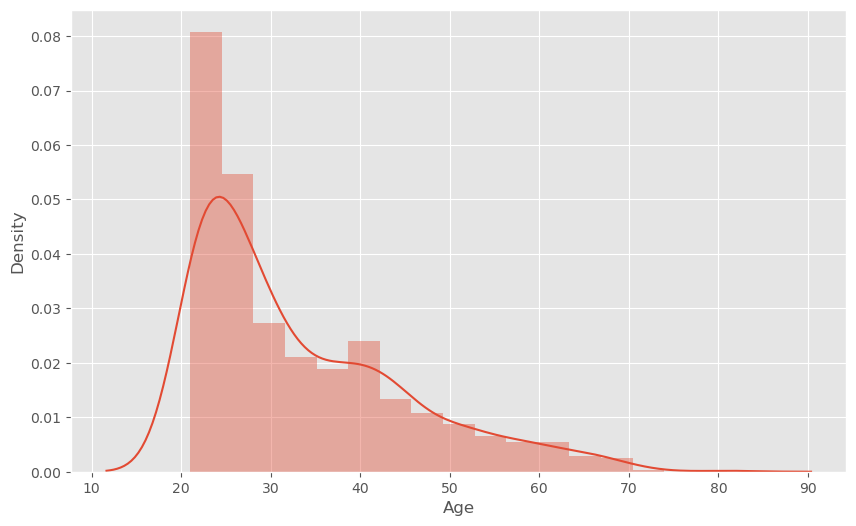

In [8]:
#plot histogram of age variable

plt.figure(figsize=(10,6))
sns.distplot(df.Age)

In [9]:
#min age
df["Age"].min()

21

In [10]:
df["Age"].max()

81

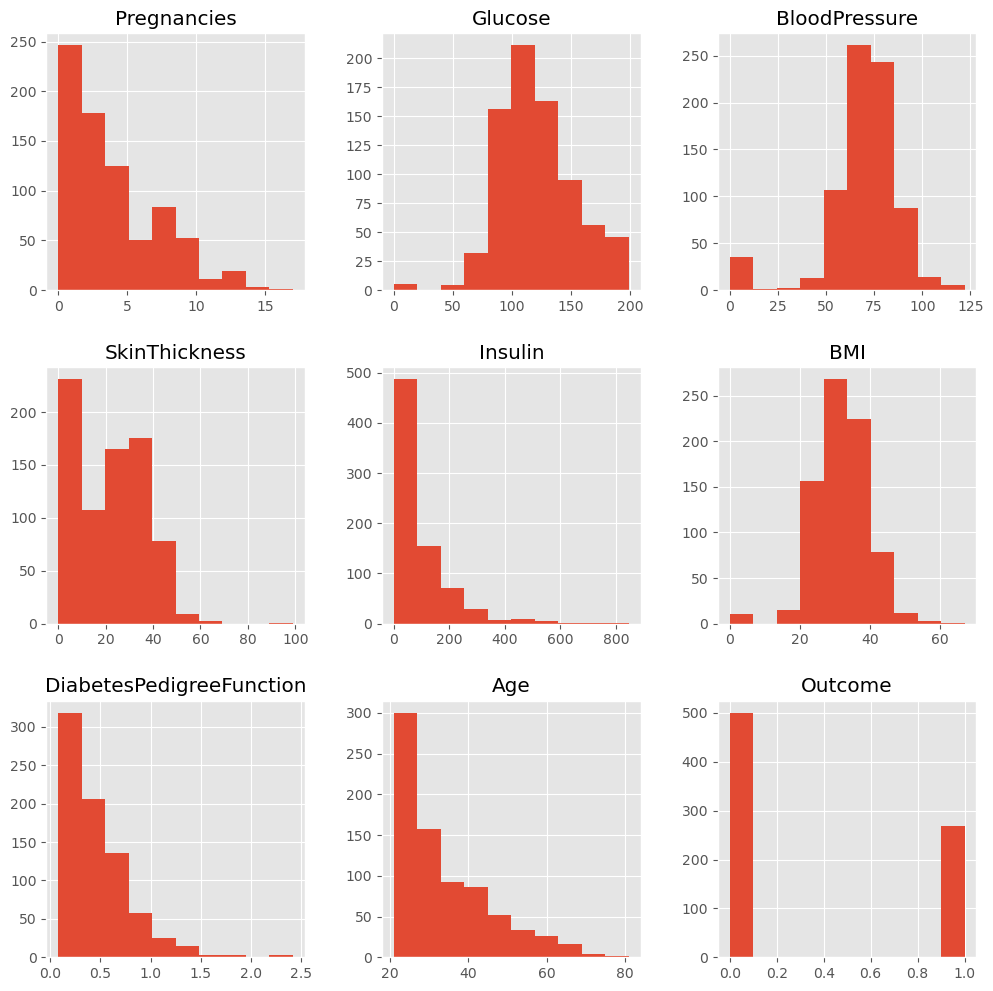

In [11]:
#plot distplots of the features

df.hist(figsize=(12,12),layout=(3,3),sharex=False);

In [12]:
df.groupby("Outcome").agg({"Pregnancies": "mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [13]:
df.groupby("Outcome").agg({"Pregnancies": "max"})

,Pregnancies
Outcome,
0,13
1,17


([<matplotlib.patches.Wedge at 0x245d0af7090>,
 [Text(-0.5482847173825081, 1.0674192562834828, 'healthy'),
  Text(0.5025944158780503, -0.9784676045369114, 'diabetes')],
 [Text(-0.31983275180646303, 0.6226612328320316, '65.10'),
  Text(0.2741424086607547, -0.5337096024746789, '34.90')])

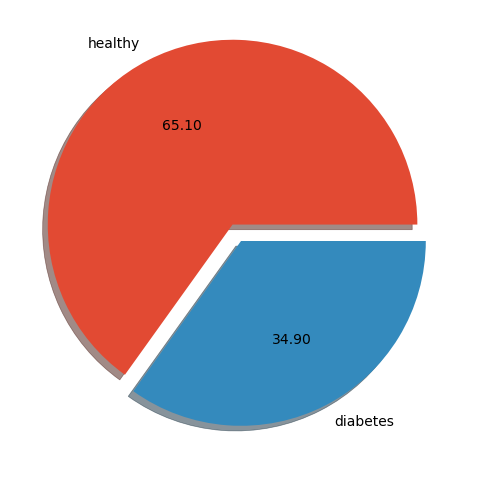

In [14]:
#0 > healthy
#1 > diabetes
 #plot a pieplot

plt.figure(figsize=(10,6))
plt.pie(df["Outcome"].value_counts(),autopct="%.2f",labels=["healthy","diabetes"],explode=[0.1,0],shadow=True)


In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


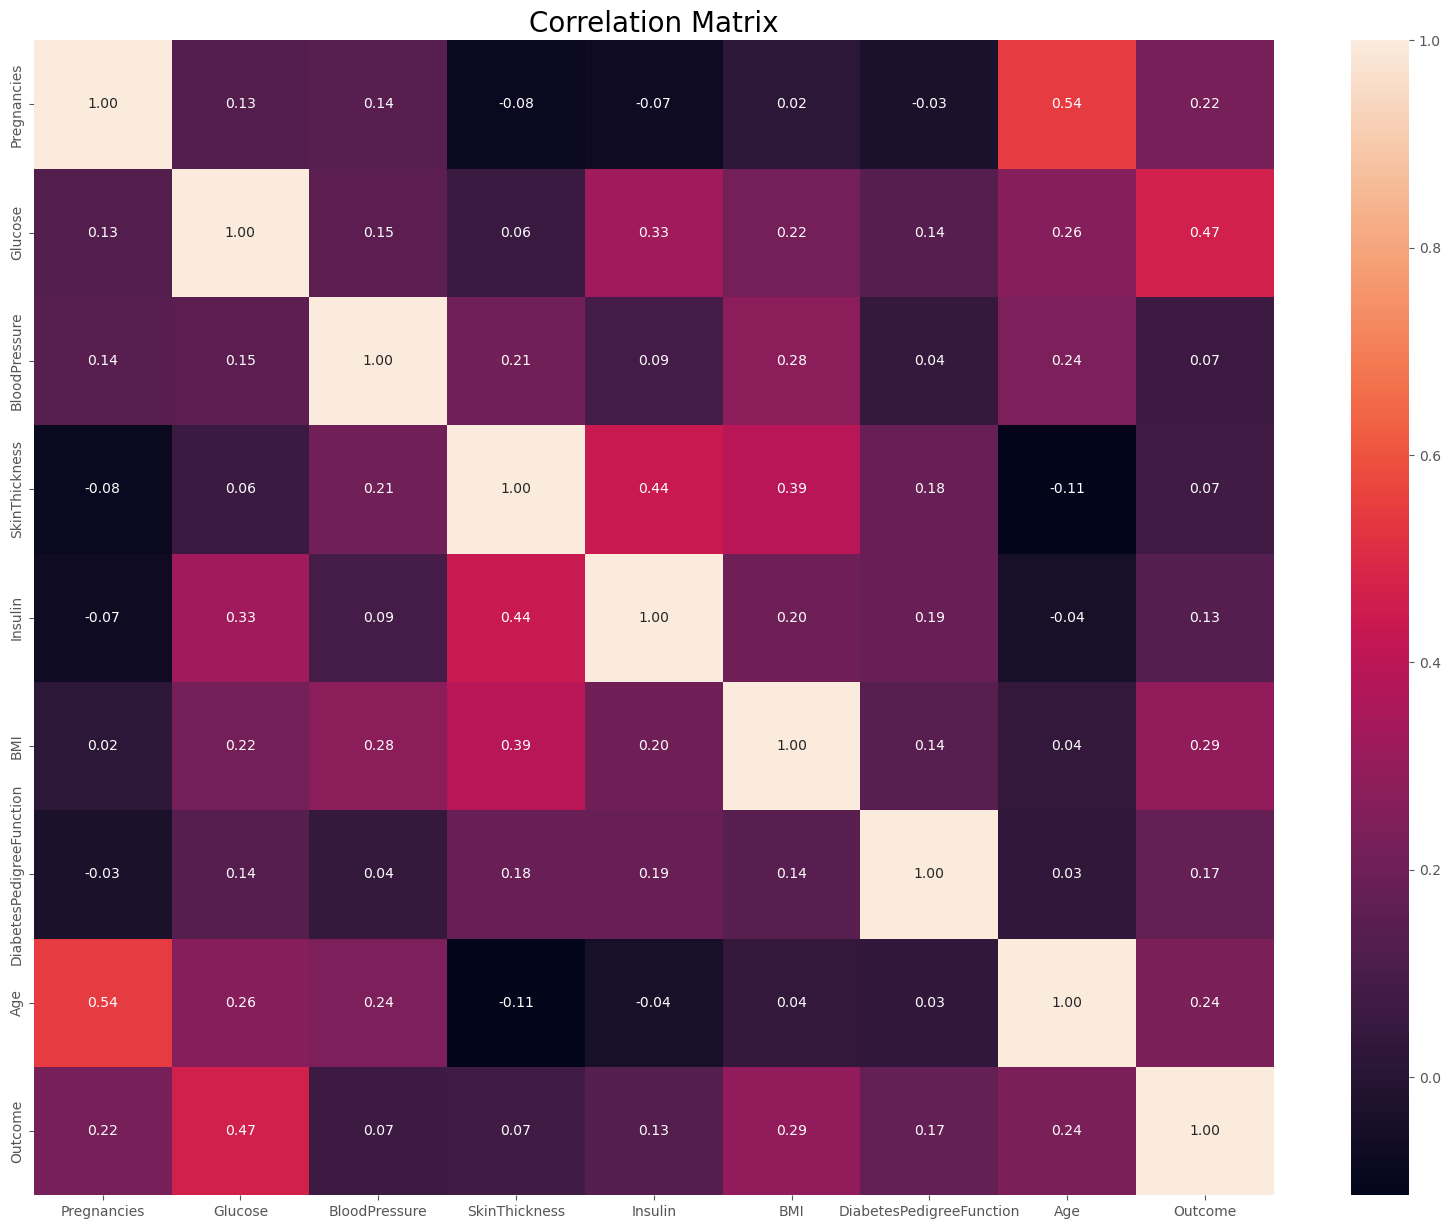

In [16]:
#plot a corr matrix 

f, ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(),annot=True,fmt=".2f",ax=ax)
ax.set_title("Correlation Matrix", fontsize = 20)
plt.show()

DATA PREPROCESSING 

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
       "BMI", "DiabetesPedigreeFunction", "Age"]] = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin","BMI", "DiabetesPedigreeFunction", "Age"]].replace(0, np.NaN)

In [19]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
#import missingno as msno 
#msno.bar(df, color = "red") visualize the missing data 

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [22]:
#replace Nan values with median 

def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, "Outcome"]].groupby(["Outcome"])[[var]].median().reset_index()
    return temp

#group the DF by values in the column "Outcome"
#apply the function "median_target" to the column "var"
#replace the Nan values with the median value of the Outcome 1 and 0

In [23]:
columns = df.columns
columns = columns.drop("Outcome")

for i in columns:
    median_target(i)
    df.loc[(df["Outcome"] == 0) & (df[i].isnull()), i] = median_target(i)[i][0] #select rows that are null where "outcome" is 0 and replace them with the median
    df.loc[(df["Outcome"]==1) & (df[i].isnull()), i] = median_target(i)[i][1]   #selct null rows where "Outcome" is 1 and replace them with the median

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

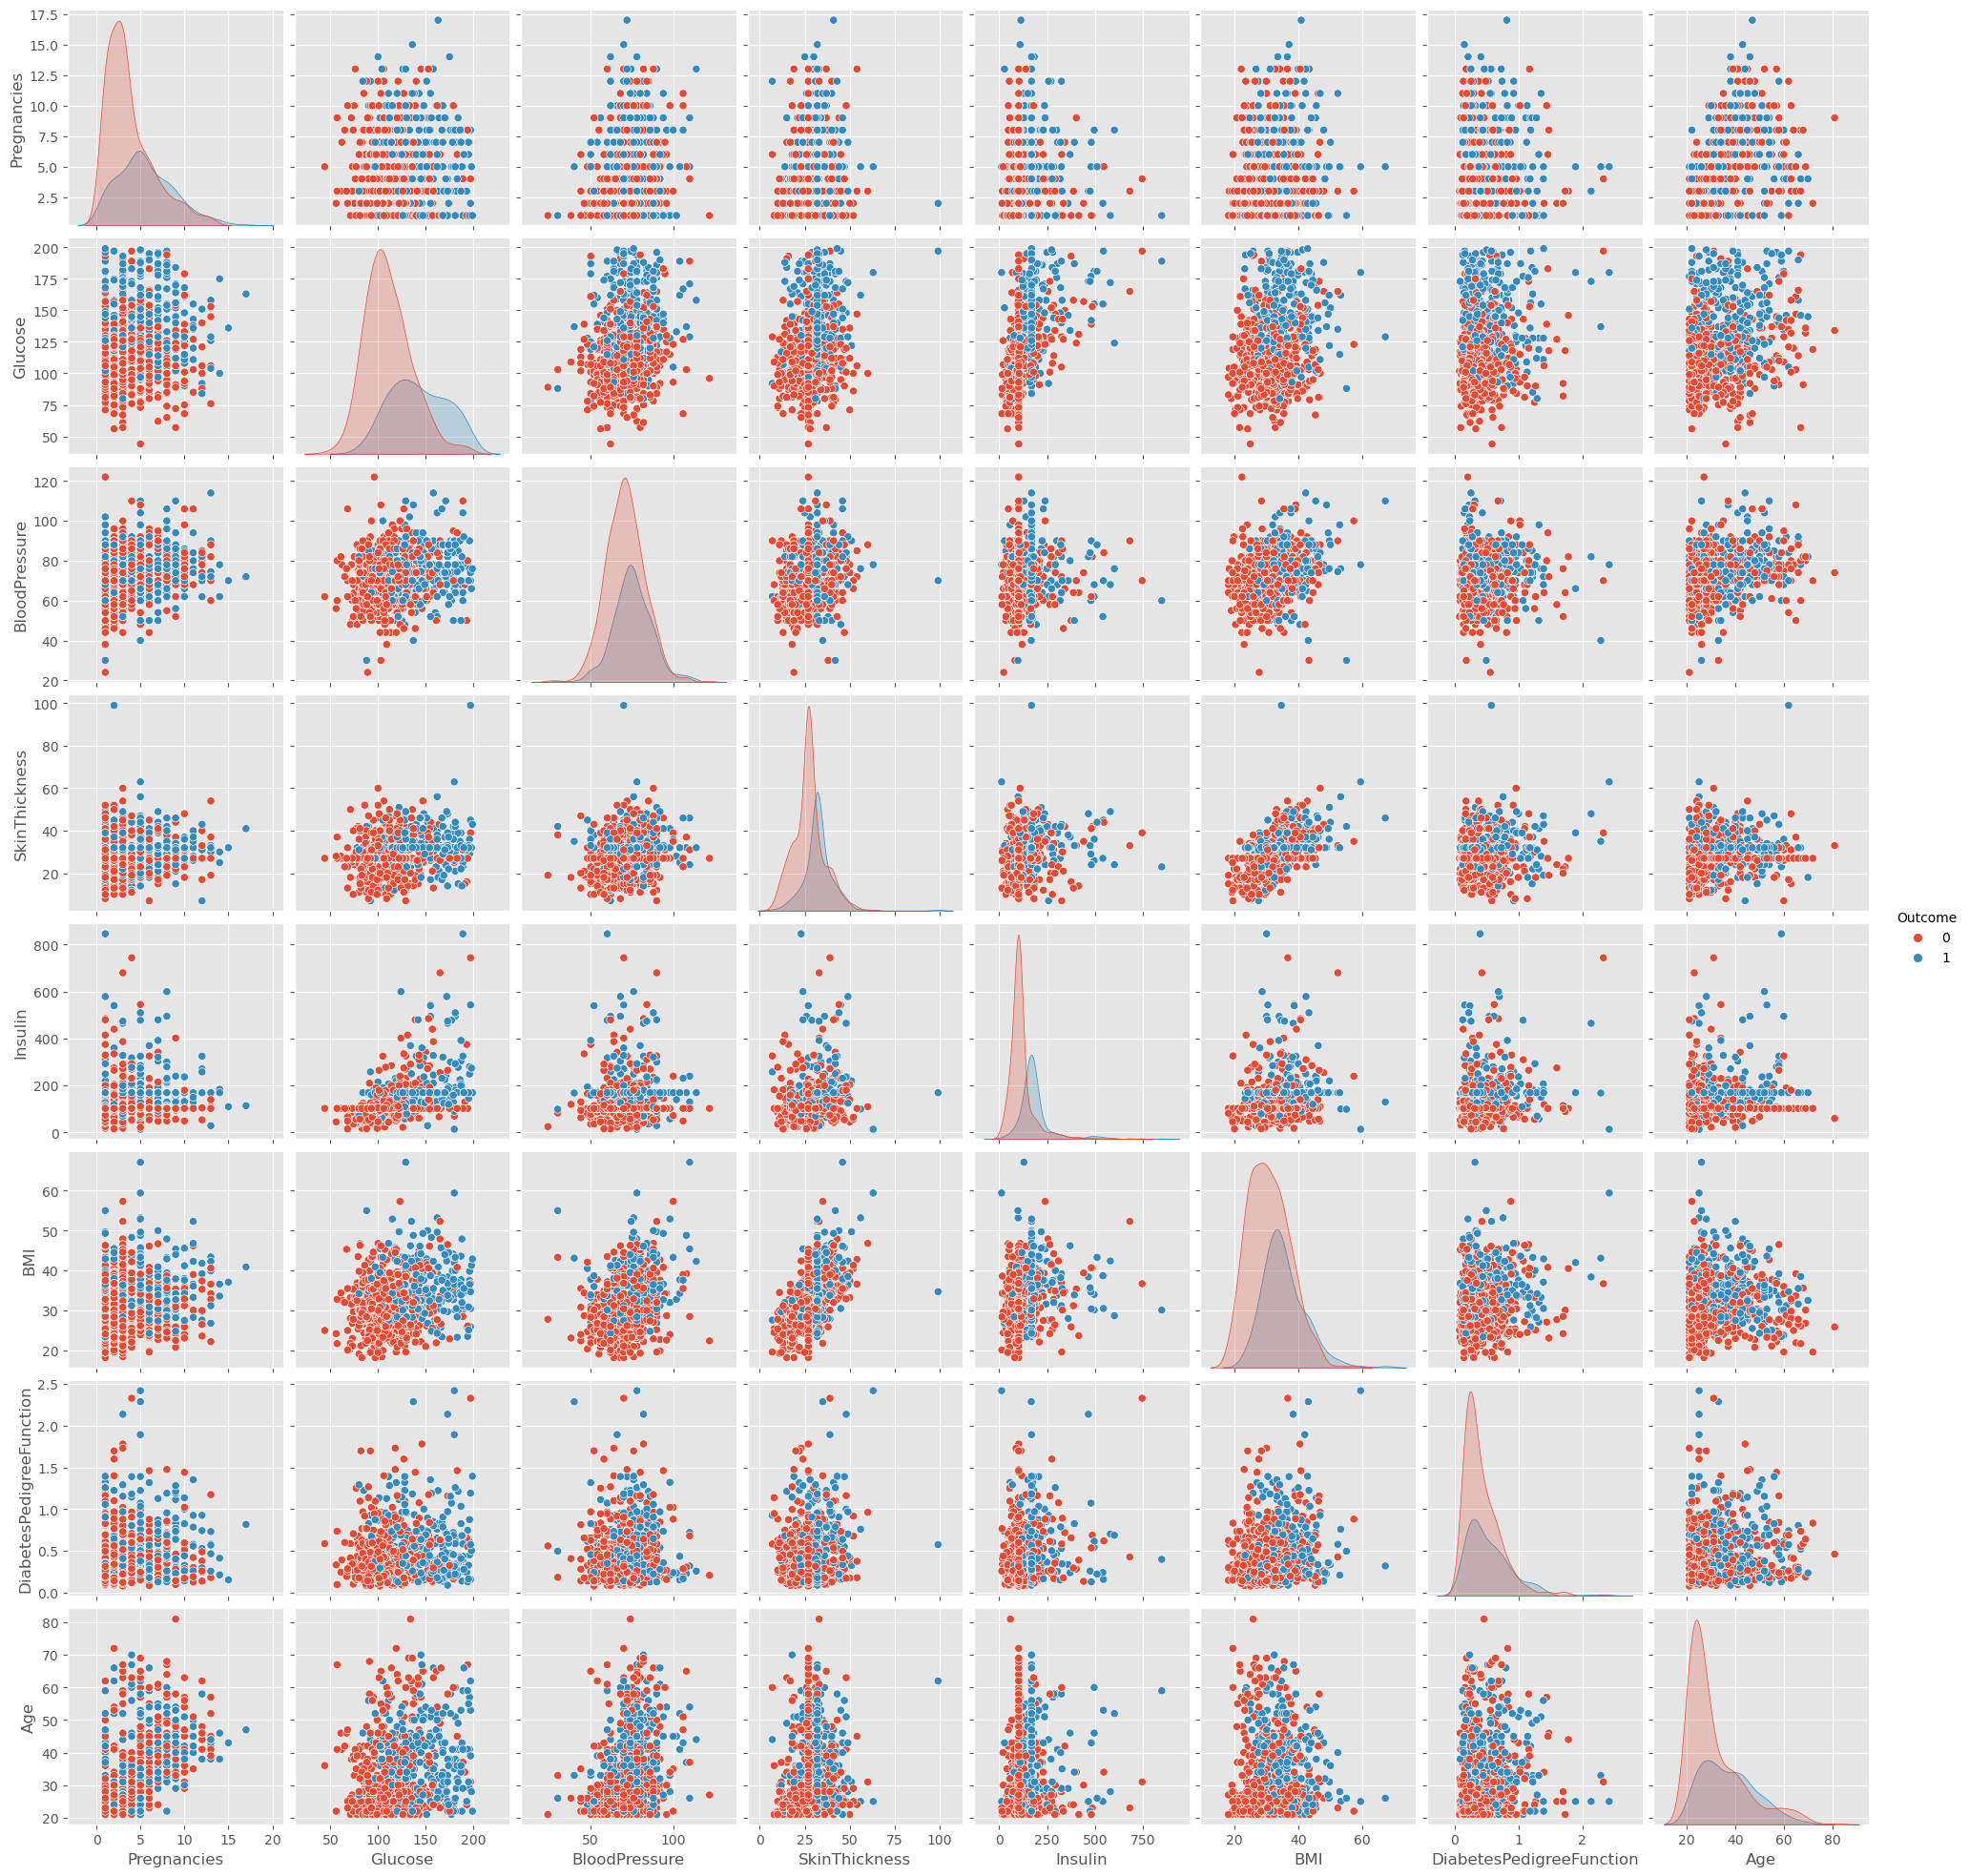

In [26]:
#pair plot 

p = sns.pairplot(df, hue="Outcome")

Outlier Detection 

In [27]:
#IQR + Q1

for feature in df:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

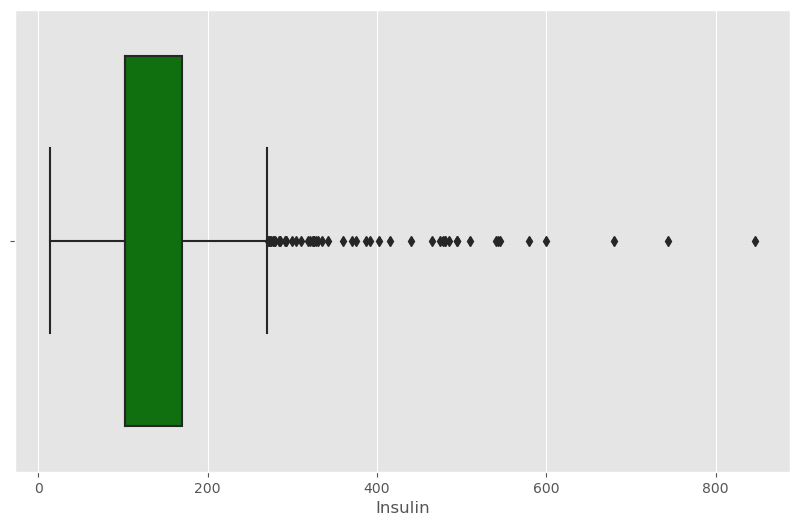

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df["Insulin"], color = "green")

the individual points outside the whiskers showcase the outliers 

In [29]:
Q1 = df.Insulin.quantile(.25)
q3 = df.Insulin.quantile(.75)
IQR = q3 - Q1
lower = Q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
df.loc[df["Insulin"] > upper, "Insulin"] = upper 

<Axes: xlabel='Insulin'>

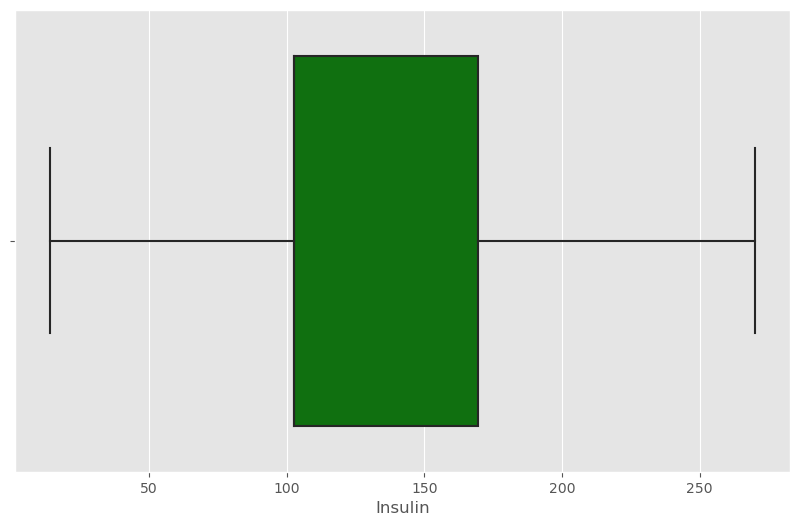

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x= df["Insulin"], color = "green")

#plots the upper IQ range of Insulin variable

In [31]:
#Local Outllier Factor 

from sklearn.neighbors import LocalOutlierFactor  #to identify density-based outliers/anomalies 
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df) 

#outliers are data points that have a significantly lower density than their neighbors.

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

<Axes: xlabel='Pregnancies'>

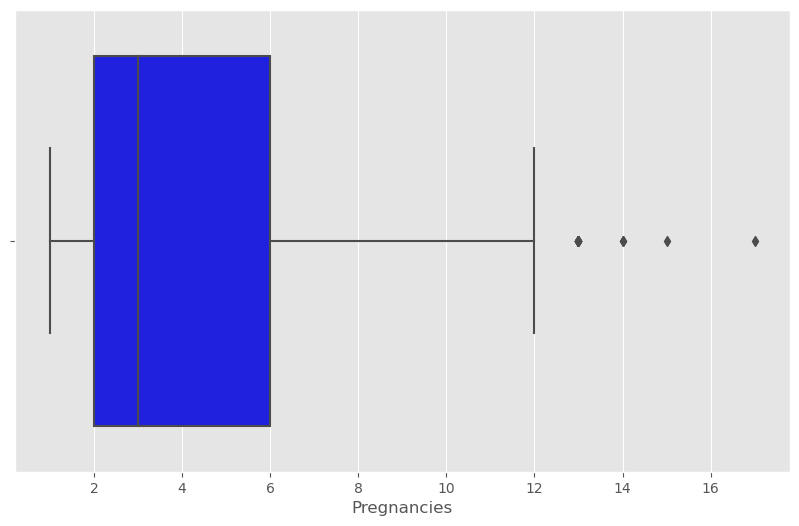

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Pregnancies"], color = "blue")

In [33]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]  #sorts array in ascending order

#selects the first 20 elements in the sorted array 

#the more negative the scores, the more they are anomalous.

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [34]:
threshold = np.sort(df_scores)[7]

threshold  #choose appropriate threshold before dropping the other outliers 

-1.7497423670960557

In [35]:
outlier = df_scores > threshold 

In [36]:
df[outlier]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [37]:
df.shape

(768, 9)

Feature Engineering 

In [38]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [39]:
NewBMI 

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [40]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [42]:
#insulin >=16 and <=166 <- normal range
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

#measured in mIU/L, normal levels of insulin are 16-166 mIU/L 

In [43]:
df = df.assign(NewInsulinScore = df.apply(set_insulin, axis = 1))

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [45]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")

df["NewGlucose"] = NewGlucose 
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0] 
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2] 
df.loc[df["Glucose"] > 126, "NewGlucose"] = NewGlucose[3] 

In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


One-hot Encoding (attributing binary to categorical columns)

In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [48]:
df = pd.get_dummies(df, columns=["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first = True, dtype=int)

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,1,0,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,1,0,0,0,1,0,1,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,1,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,1,0,0,0,1,0,1,0,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [50]:
df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [51]:
categorical_df = df[['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [52]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [53]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [54]:
#Assign columns and index to the dataframe

cols = X.columns 

index = X.index

In [55]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [56]:
X = pd.concat([X, categorical_df], axis=1)  #add categorical data to the df 

In [57]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,0,1,0,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,0,0,0,1,0,1,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,0,1,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,0,0,0,1,0,1,0,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,0,0,1,0,0,0,0,0,0,1


In [58]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [59]:
scaler = StandardScaler()

X_train =scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Machine Learning Algorithms 

Logistic Regression 

In [60]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = log_reg.predict(X_test)

In [62]:
#accuracy of the model on trained data 

accuracy_score(y_train, log_reg.predict(X_train))

0.8550488599348535

In [63]:
#perfomance of the algo on test data 

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [64]:
confusion_matrix(y_test, y_pred)

array([[98,  9],
       [ 7, 40]], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       107
           1       0.82      0.85      0.83        47

    accuracy                           0.90       154
   macro avg       0.87      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154



KNN Neighbors 

In [66]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred =knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc= accuracy_score(y_test, knn.predict(X_test))

print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8876221498371335
0.8766233766233766
[[96 11]
 [ 8 39]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       107
           1       0.78      0.83      0.80        47

    accuracy                           0.88       154
   macro avg       0.85      0.86      0.86       154
weighted avg       0.88      0.88      0.88       154



Support Vector Machines (SVM)

In [67]:
svc = SVC(probability=True)

parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20]  #to regularize the model 
}

grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train) 

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [68]:
#best_parameter

grid_search.best_params_ 

{'C': 15, 'gamma': 0.01}

In [69]:
grid_search.best_score_ 

0.8550179928028788

In [70]:
svc = SVC(C = 10, gamma = 0.01, probability=True)

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8697068403908795
0.9090909090909091
[[100   7]
 [  7  40]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.85      0.85      0.85        47

    accuracy                           0.91       154
   macro avg       0.89      0.89      0.89       154
weighted avg       0.91      0.91      0.91       154



Decision Tree 

In [71]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

1.0
0.7922077922077922
[[86 21]
 [11 36]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       107
           1       0.63      0.77      0.69        47

    accuracy                           0.79       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.81      0.79      0.80       154



Hyperparameter tuning of Decision Tree 

In [72]:
#searching for the best params to apply, using GridSearchCV()

grid_param = {
    'criterion' :['gini','entropy'],  #gini measures the impurty of the nodes
    'max_depth' :[3,5,7,10],
    'splitter'  :['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split' :[1,2,3,5,7],
    'max_features' :['auto', 'sqrt', 'log2']
}

grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [73]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'splitter': 'best'}

In [74]:
grid_search_dt.best_score_ 

0.8703846153846153

In [75]:
DT = grid_search_dt.best_estimator_

y_pred = DT.predict(X_test)

print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(dt_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9039087947882736
0.7792207792207793
[[85 22]
 [12 35]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       107
           1       0.61      0.74      0.67        47

    accuracy                           0.78       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.80      0.78      0.78       154



RandomForest 

An ensemble of decision tress, trained via bagging method 

In [76]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split=3, n_estimators =130)

rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [77]:
y_pred = rand_clf.predict(X_test) 

In [78]:
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, y_pred)
print(rand_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.990228013029316
0.8961038961038961
[[98  9]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       107
           1       0.82      0.85      0.83        47

    accuracy                           0.90       154
   macro avg       0.87      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154



Gradient Boosting Classifier :-

-   Sequentially adds predictors to an ensemble, each one correcting it's predecessor.

Learning rate hyperparameter scales contribution of each tree

In [79]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate' : [0.001, 0.1, 1, 10],
    'n_estimators' : [100, 150, 180, 200] #number of trees 
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv=10, n_jobs=1,verbose = 1)

grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

If GBC takes too long, use XGBoost instead, which is fast, scalable and portable 

In [80]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100}

In [81]:
grid_search_gbc.best_score_

0.8843469063987307

In [82]:
gbc = GradientBoostingClassifier(learning_rate= 1, loss = 'exponential', n_estimators = 150)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=150)

In [83]:
gbc = grid_search_gbc.best_estimator_ 

y_pred =gbc.predict(X_test)

print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
0.8961038961038961
[[97 10]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       107
           1       0.80      0.87      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.89      0.88       154
weighted avg       0.90      0.90      0.90       154



classifier performed well with high accuracy, precicision, recall and f1 scores, especially for class 0. 

In [84]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = "binary:logistic", learning_rate = 0.01, max_depth = 10, n_estiamtors = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estiamtors=180, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [85]:
y_pred = xgb.predict(X_test)

print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, y_pred)

print(xgb_acc)
print(confusion_matrix(y_test, y_pred))
print((classification_report(y_test, y_pred)))

0.9527687296416938
0.8701298701298701
[[102   5]
 [ 15  32]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       107
           1       0.86      0.68      0.76        47

    accuracy                           0.87       154
   macro avg       0.87      0.82      0.84       154
weighted avg       0.87      0.87      0.87       154



Model Comparison 

In [87]:
models = pd.DataFrame({
    'Model': [ 'LogisticRegression', 'KNN', 'SVM', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc, 4), 100*round(knn_acc, 4), 100*round(svc_acc, 4), 100*round(dt_acc, 4), 100*round(rand_acc, 4), 100*round(gbc_acc), 100*round(xgb_acc, 4)]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,GradientBoostingClassifier,100.00
2,SVM,90.91
0,LogisticRegression,89.61
4,RandomForestClassifier,89.61
1,KNN,87.66
6,XgBoost,87.01
3,DecisionTreeClassifier,77.92


Import pickle for serialization of models (gbc) 

In [88]:
import pickle 

model = gbc_acc
pickle.dump(model, open("diabetes.pkl", 'wb'))

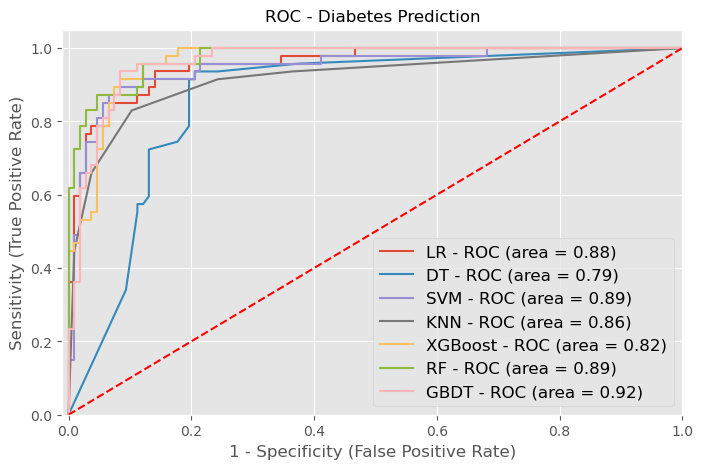

In [95]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

GBDT, SVM and XGBoost perform well 

Performance Evaluation of the Models, based on Accuracy and ROC curve (Receiver Operating Characteristic Curve). 

In [93]:

from sklearn import metrics
import numpy as np 
import matplotlib.pyplot as plt 

[89.61, 77.92, 90.91, 87.66000000000001, 87.01, 89.61, 89.61]
[88.35, 87.62, 89.28, 86.35000000000001, 81.71000000000001, 89.41, 91.53999999999999]


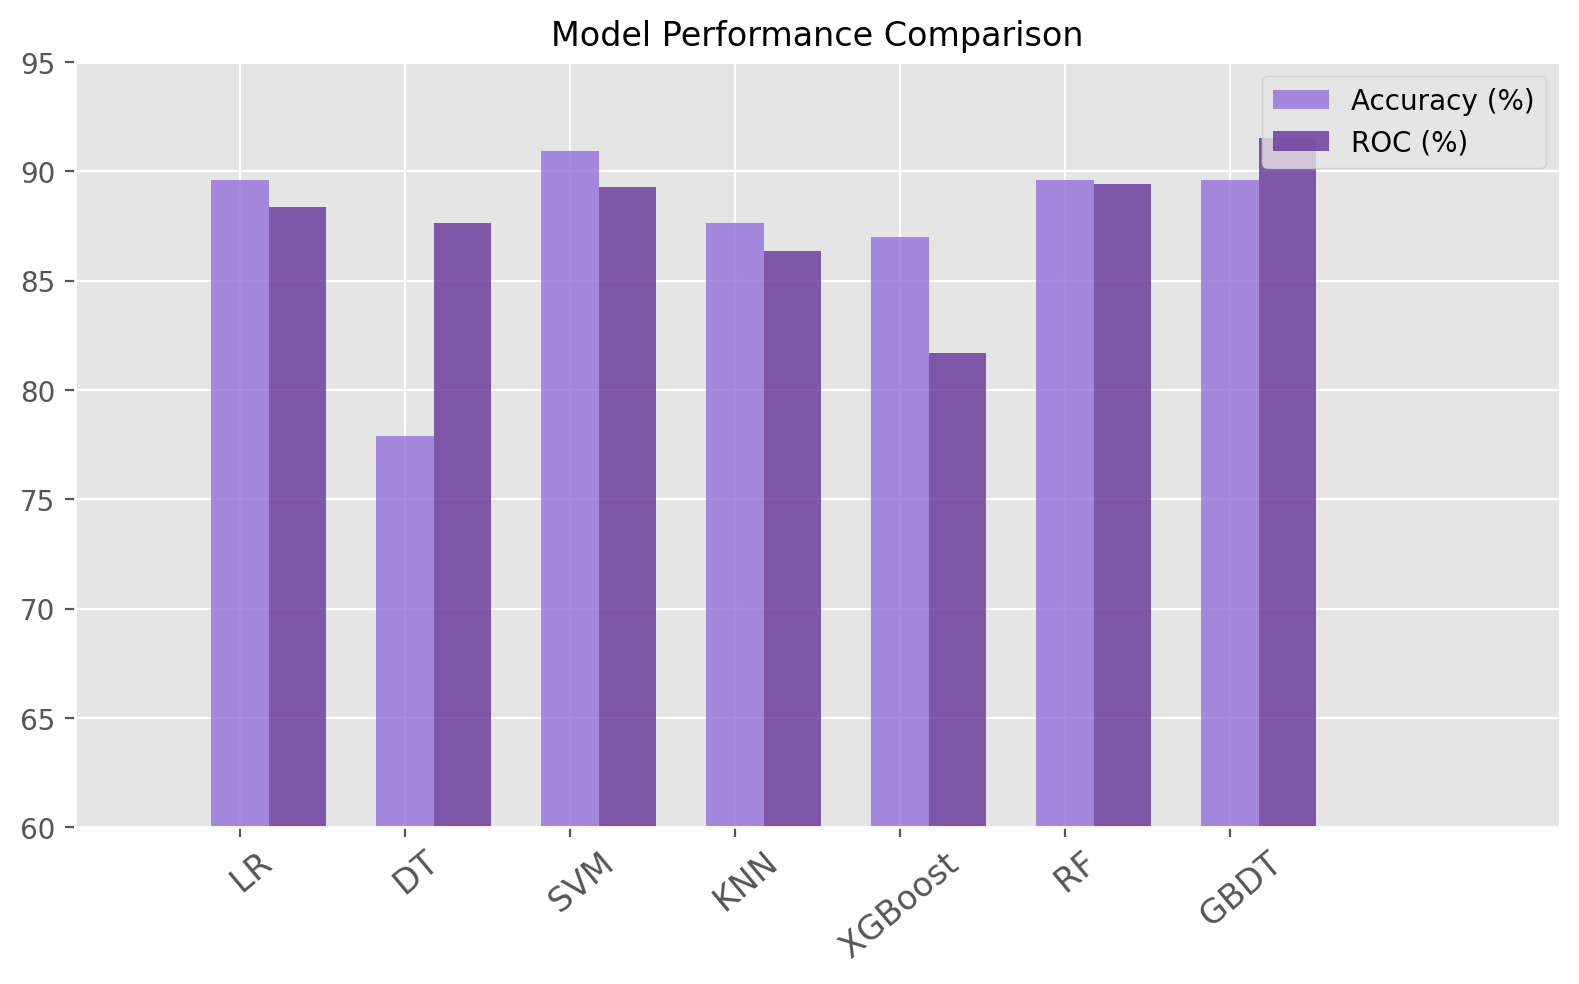

In [100]:
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc, 4), 100*round(dt_acc, 4), 100*round(svc_acc, 4), 100*round(knn_acc, 4), 100*round(xgb_acc, 4), 100* round(rand_acc, 4), 100*round(gbc_acc, 4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, y_pred)
    auc = 100*round(auc, 4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

#data to plot  
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

#create plot 

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')  #or just %config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35 
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha = opacity,
color = 'mediumPurple',
label = 'Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha = opacity,
color = 'rebeccaPurple',
label = 'ROC (%)')


plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Model Performance Comparison', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)

fig.tight_layout()
plt.show()


